<a href="https://colab.research.google.com/github/mahdijalil/GymNotebook/blob/main/Gym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/workout_data.csv')
df.head()

,title,start_time,end_time,description,exercise_title,superset_id,exercise_notes,set_index,set_type,weight_lbs,reps,distance_km,duration_seconds
0,Leg Day,"8 Nov 2021, 18:07","8 Nov 2021, 18:12",NaN,Squat (Barbell),NaN,NaN,0,normal,45.0,10,NaN,NaN
1,Leg Day,"8 Nov 2021, 18:07","8 Nov 2021, 18:12",NaN,Squat (Barbell),NaN,NaN,1,normal,70.0,4,NaN,NaN
2,Leg Day,"8 Nov 2021, 18:07","8 Nov 2021, 18:12",NaN,Squat (Barbell),NaN,NaN,2,normal,65.0,6,NaN,NaN
3,Leg Day,"8 Nov 2021, 18:07","8 Nov 2021, 18:12",NaN,Leg Extension (Machine),NaN,NaN,0,normal,115.0,10,NaN,NaN
4,Leg Day,"8 Nov 2021, 18:07","8 Nov 2021, 18:12",NaN,Leg Extension (Machine),NaN,NaN,1,normal,115.0,8,NaN,NaN


# Maximum weight (PRS)


In [ ]:
max_workout = df.groupby(by=['exercise_title']).max()
max_workout[['start_time','weight_lbs']]

,start_time,weight_lbs
exercise_title,,
Bench Press (Barbell),"8 Oct 2021, 17:23",45.0
Bicep Curl (Dumbbell),"6 Oct 2021, 18:55",30.0
Cable Fly Crossovers,"3 Nov 2021, 21:33",25.0
Crunch (Machine),"8 Nov 2021, 18:07",60.0
Deadlift (Barbell),"10 Oct 2021, 17:49",70.0
Hammer Curl (Dumbbell),"6 Oct 2021, 18:55",30.0
Incline Bench Press (Barbell),"8 Oct 2021, 17:23",35.0
Incline Bench Press (Dumbbell),"25 Sep 2021, 14:22",25.0
Lat Pulldown (Cable),"6 Oct 2021, 18:55",100.0


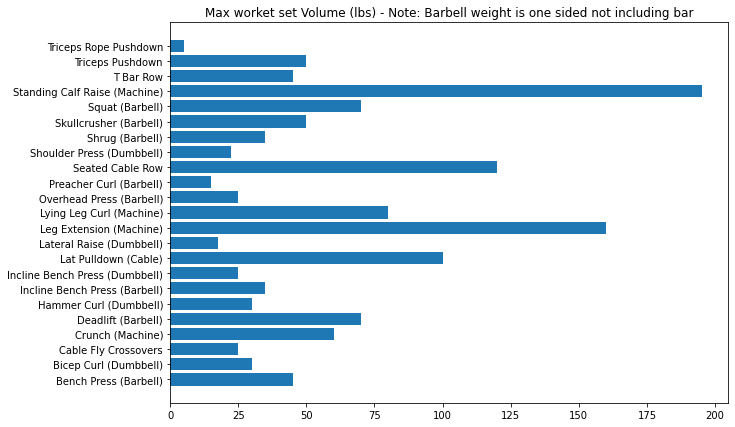

In [ ]:
x = max_workout.index
y = max_workout['weight_lbs']
fig = plt.figure(figsize =(10, 7))
plt.barh(x,y )
plt.title('Max worket set Volume (lbs) - Note: Barbell weight is one sided not including bar')
plt.show()


In [ ]:
df['start_time'] = pd.to_datetime(df['start_time'])
max_progress_workout = df[['start_time','exercise_title','weight_lbs']]
#max_progress_workout = max_progress_workout.groupby(by=['start_time','exercise_title']).max().reset_index()
max_progress_workout

,start_time,exercise_title,weight_lbs
0,2021-11-08 18:07:00,Squat (Barbell),45.0
1,2021-11-08 18:07:00,Squat (Barbell),70.0
2,2021-11-08 18:07:00,Squat (Barbell),65.0
3,2021-11-08 18:07:00,Leg Extension (Machine),115.0
4,2021-11-08 18:07:00,Leg Extension (Machine),115.0
...,...,...,...
349,2021-09-15 21:58:00,Cable Fly Crossovers,17.0
350,2021-09-15 21:58:00,Triceps Rope Pushdown,5.0
351,2021-09-15 21:58:00,Skullcrusher (Barbell),30.0
352,2021-09-15 21:58:00,Skullcrusher (Barbell),30.0


# Workout progress

In [ ]:
dt = df[['title', 'start_time','exercise_title', 'weight_lbs']]
leg_day_progress = dt.where(dt.title == "Leg Day").dropna()
pull_day_progress = dt.where(dt.title == "Pull").dropna()
push_day_progress = dt.where(dt.title == "Push Day").dropna()


In [ ]:
leg_day_progress = leg_day_progress.groupby(['start_time','exercise_title']).max()
pull_day_progress= pull_day_progress.groupby(['start_time','exercise_title']).max()
push_day_progress = push_day_progress.groupby(['start_time','exercise_title']).max()


In [ ]:
leg_day_progress = leg_day_progress[['weight_lbs']]
leg_day_progress = pd.pivot_table(leg_day_progress, values='weight_lbs', index=['start_time'],
                    columns=['exercise_title'], fill_value=np.NaN)

pull_day_progress = pull_day_progress[['weight_lbs']]
pull_day_progress = pd.pivot_table(pull_day_progress, values='weight_lbs', index=['start_time'],
                    columns=['exercise_title'], fill_value=np.NaN)

push_day_progress = push_day_progress[['weight_lbs']]
push_day_progress = pd.pivot_table(push_day_progress, values='weight_lbs', index=['start_time'],
                    columns=['exercise_title'], fill_value=np.NaN)

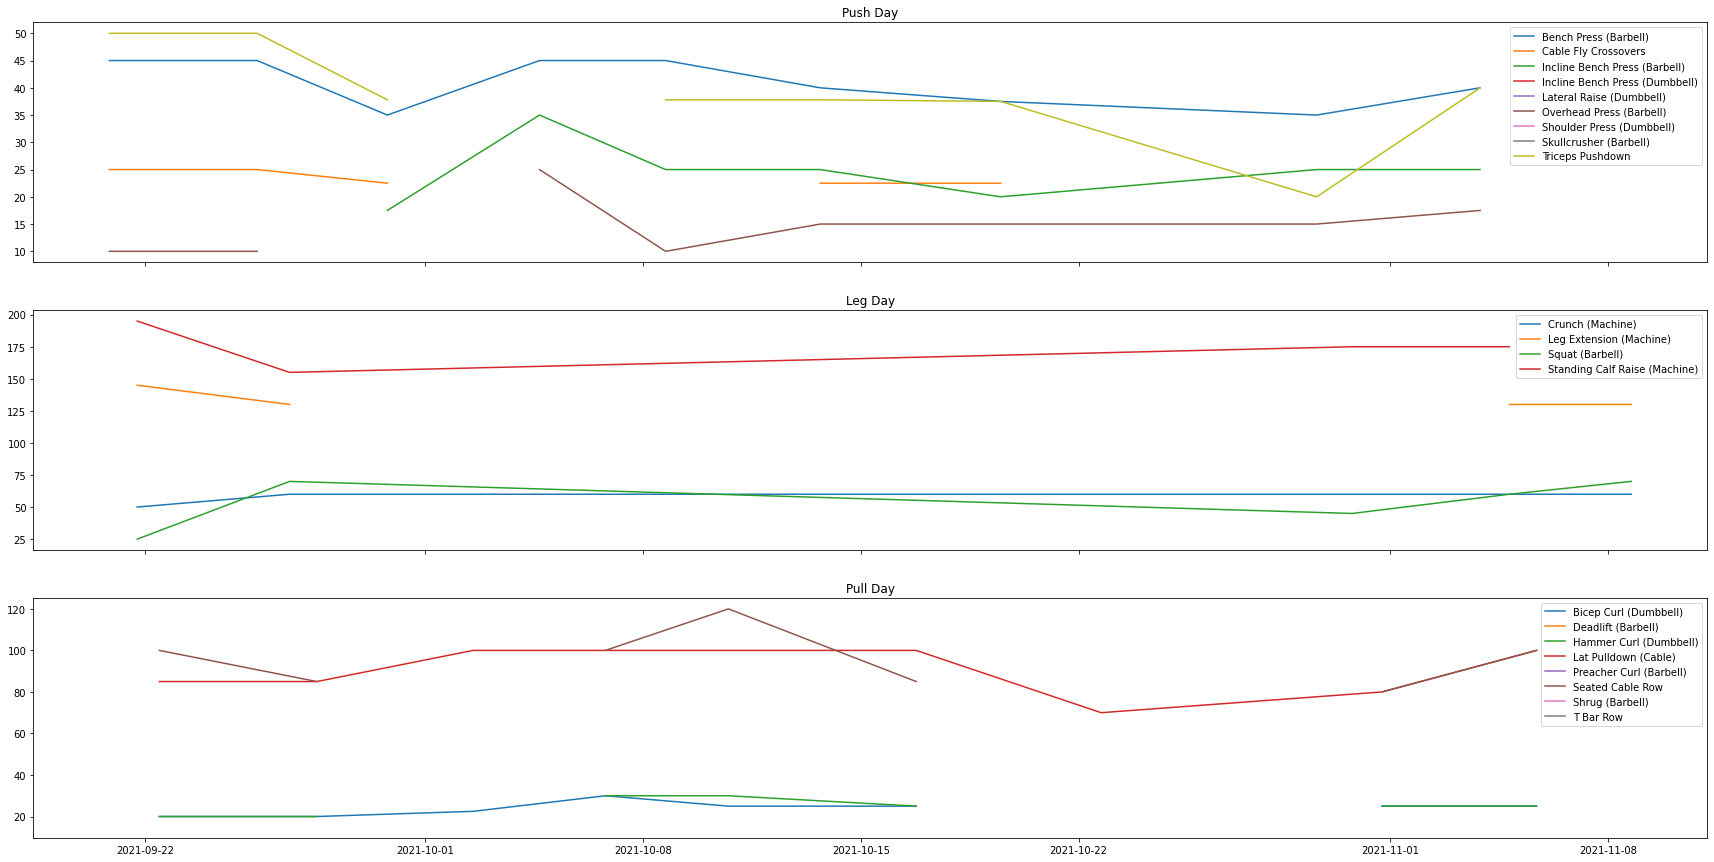

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, sharex=True,figsize=(30,15))

ax1.plot(push_day_progress)
ax1.set_title('Push Day')
ax1.legend(push_day_progress.columns,loc='upper right')

ax2.plot(leg_day_progress)
ax2.set_title('Leg Day')
ax2.legend(leg_day_progress.columns,loc='upper right')



ax3.plot(pull_day_progress)
ax3.set_title('Pull Day')
ax3.legend(pull_day_progress.columns,loc='upper right')




#Progress

In [ ]:
dt = df[['title', 'start_time','exercise_title', 'weight_lbs']]
leg_day_progress = dt.where(dt.title == "Leg Day").dropna()
pull_day_progress = dt.where(dt.title == "Pull").dropna()
push_day_progress = dt.where(dt.title == "Push Day").dropna()
leg_day_max = leg_day_progress.groupby(['exercise_title']).max()
pull_day_max = pull_day_progress.groupby(['exercise_title']).max()
push_day_max = push_day_progress.groupby(['exercise_title']).max()

leg_day_min = leg_day_progress.groupby(['exercise_title']).min()
pull_day_min = pull_day_progress.groupby(['exercise_title']).min()
push_day_min = push_day_progress.groupby(['exercise_title']).min()


In [ ]:
legdaychange = 100.00* (leg_day_max['weight_lbs'] - leg_day_min['weight_lbs'])/leg_day_min['weight_lbs']
pulldaychange =100.00* (pull_day_max['weight_lbs'] - pull_day_min['weight_lbs'])/pull_day_min['weight_lbs']
pushdaychange = 100.00* (push_day_max['weight_lbs'] - push_day_min['weight_lbs'])/push_day_min['weight_lbs']
pushdaychange = pd.DataFrame(data = pushdaychange)
pulldaychange = pd.DataFrame(data = pulldaychange)
legdaychange = pd.DataFrame(data = legdaychange)




<BarContainer object of 4 artists>

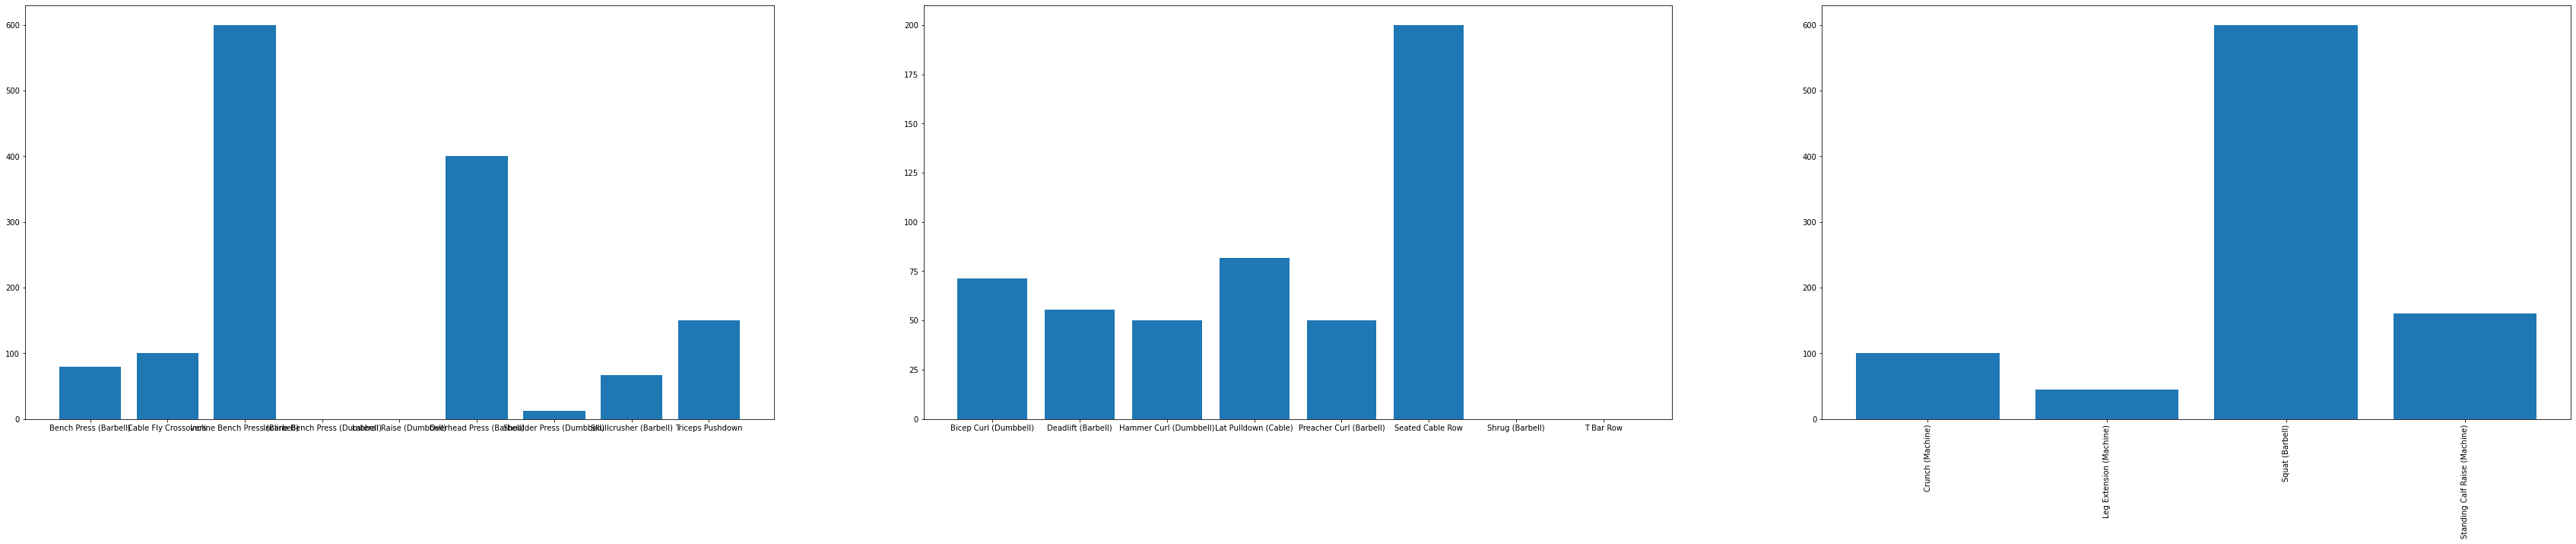

In [ ]:
fig, ((ax1, ax2,ax3)) = plt.subplots(1, 3,figsize = [60,10])

ax1.bar(pushdaychange.index,pushdaychange.weight_lbs)
plt.xticks(rotation=90)
ax2.bar(pulldaychange.index,pulldaychange.weight_lbs)
ax3.bar(legdaychange.index,legdaychange.weight_lbs)

<BarContainer object of 9 artists>

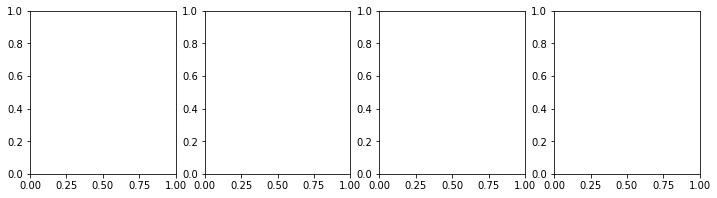

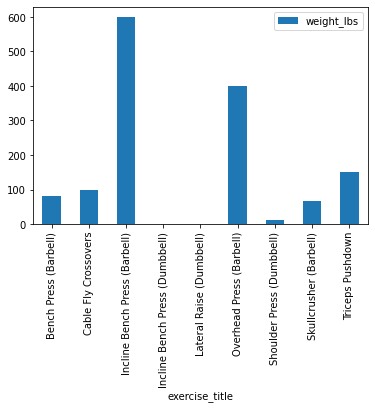